In [1]:
# -*- encoding: utf-8 -*-
import numpy as np
from DataLoad import DataLoad
from matplotlib import pyplot as plt

In [2]:

class TSP(object):
    def __init__(self, c_rate, m_rate, pop_size, iteration=500, seed=2023):
        self.cities = np.array([])  # 城市数组
        self.cities_name = np.array([])
        self.city_size = -1  # 标记城市数目
        self.pop_size = int(pop_size)  # 种群大小
        self.fitness = np.zeros(self.pop_size)  # 种群适应度
        self.c_rate = c_rate  # 交叉阈值
        self.m_rate = m_rate  # 突变阈值
        self.iteration = iteration  # 迭代次数
        self.best_dist = -1  # 最优距离
        self.best_gene = [44,32,38,9,48,8,29,33,49,20,28,15,1,19,34,35,2,27,30,25,7,21,0,31,10,37,4,11,16,3,46,45,50,26,5,47,22,6,42,23,13,24,17,12,40,39,18,41,43,36,14]
        np.random.seed(seed)  # 随机种子

        self.load = DataLoad()  # 数据加载类

        self.init()  # 初始化
        self.draw()  # 绘制

    def init(self):

        self.cities, self.cities_name, self.city_size = self.load.load_cities3()
        self.pop = self.create_pop(self.pop_size)  # 创建种群
        self.fitness = self.get_fitness(self.pop)  # 计算初始种群适应度

    def create_pop(self, size):
        pop = [np.random.permutation(self.city_size) for _ in range(size)]
        return np.array(pop)
    
    def get_fitness(self, pop):
        d = np.array([])  # 适应度记录数组
        for i in range(pop.shape[0]):
            gen = pop[i]  # 取其中一条基因（编码解，个体）
            dis = self.gen_distance(gen)  # 计算此基因优劣（距离长短）
            dis = self.best_dist / dis  # 当前最优距离除以当前pop[i]（个体）距离；越近适应度越高，最优适应度为1
            d = np.append(d, dis)  # 保存适应度pop[i]
        return d
    
    def gen_distance(self, gen):
        # 计算基因所代表的总旅行距离
        distance = 0.0
        for i in range(-1, len(self.cities) - 1):
            index1, index2 = gen[i], gen[i + 1]
            city1, city2 = self.cities[index1], self.cities[index2]
            distance += self.ct_distance(city1, city2)
        return distance

    def ct_distance(self, city1, city2):
        # 计算2城市之间的欧氏距离
        diff = city1 - city2
        squared_diff = np.power(diff, 2)
        sum_squared_diff = np.sum(squared_diff)
        distance = np.sqrt(sum_squared_diff)
        return distance
    
    def draw(self):
        plt.figure()
        plt.scatter(self.cities[:, 0], self.cities[:, 1])

        # 设置x轴和y轴的标签
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        # 设置图形的标题
        plt.title('Scatter plot of cities')

        # 绘制连线
        for i in range(self.city_size - 1):
            city1 = self.cities[self.best_gene[i]]
            city2 = self.cities[self.best_gene[i + 1]]
            plt.plot([city1[0], city1[1]], [city2[1], city2[0]], 'r-')


        # 设置图形标题和坐标轴标签
        plt.title("City Visualization")
        plt.xlabel("X-coordinate")
        plt.ylabel("Y-coordinate")

        # 显示图形
        plt.show()

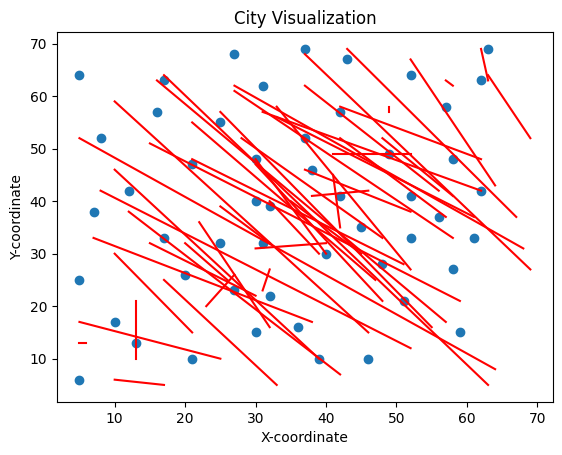

In [3]:
if __name__ == '__main__':
    c_rate = 0.3986  # 交叉阈值     0.4075 0.3986
    m_rate = 0.253  # 突变阈值    0.4345 0.253
    pop_size = 83.73  # 种群大小    84.64 83.73
    iteration = 1200  # 迭代次数
    seed = 2023  # 随机种子
    tsp = TSP(c_rate, m_rate, pop_size, iteration, seed)